In [2]:
import numpy as np
import zfit
import matplotlib.pyplot as plt

# create space
obs1 = zfit.Space("x", limits=(0, 10))
obs2 = zfit.Space("x", limits=(0, 10))

# parameters
mu1 = zfit.Parameter("mu1", 5., 1, 10, step_size=0)
sigma1 = zfit.Parameter("sigma1", 1., 0.1, 10, step_size=0)
lambd1 = zfit.Parameter("lambda1", -0.2, -1, -0.01, step_size=0)
frac1 = zfit.Parameter("fraction1", 0.5, 0, 1)

mu2 = zfit.Parameter("mu2", 5., step_size=0)
sigma2 = zfit.Parameter("sigma2", 1., step_size=0)
lambd2 = zfit.Parameter("lambda2", -0.2, step_size=0)
frac2 = zfit.Parameter("fraction2", 0.5, step_size=0)

# model building, pdf creation
gauss1 = zfit.pdf.Gauss(mu=mu1, sigma=sigma1, obs=obs1)
exponential1 = zfit.pdf.Exponential(lambd1, obs=obs1)
model1 = zfit.pdf.SumPDF([gauss1, exponential1], fracs=frac1)


gauss2 = zfit.pdf.Gauss(mu=mu2, sigma=sigma2, obs=obs2)
exponential2 = zfit.pdf.Exponential(lambd2, obs=obs2)
model2 = zfit.pdf.SumPDF([gauss2, exponential2], fracs=frac2)







/anaconda3/lib/python3.6/site-packages/zfit/__init__.py:32: UserWarning: zfit has moved from TensorFlow 1.x to 2.x, which has some profound implications behind the scenes of zfit
    and minor ones on the user side. Be sure to read the upgrade guide (can be found in the README at the top)
     to have a seemless transition. If this is currently not doable (upgrading is highly recommended though)
     you can downgrade zfit to <0.4. Feel free to contact us in case of problems in order to fix them ASAP.
  you can downgrade zfit to <0.4. Feel free to contact us in case of problems in order to fix them ASAP.""")
/anaconda3/lib/python3.6/site-packages/zfit/util/execution.py:62: UserWarning: Not running on Linux. Determining available cpus for thread can failand be overestimated. Workaround (only if too many cpus are used):`zfit.run.set_n_cpu(your_cpu_number)`
  warnings.warn("Not running on Linux. Determining available cpus for thread can fail"


In [3]:
# data
n_sample = 10000

exp_data = exponential2.sample(n=n_sample * (1 - frac2)).numpy()

gauss_data = gauss2.sample(n=n_sample * frac2).numpy()

data = model2.create_sampler(n_sample, limits=obs2)
data.resample()

In [4]:
import random
frac1.set_value(0.65)

# plot the data
data_np = data[:, 0].numpy()
color = 'black'
n_bins = 100

linewidth = 2.5
plot_scaling = n_sample / n_bins * obs1.area()

x = np.linspace(0, 10, 1000)

In [8]:
nll1 = zfit.loss.UnbinnedNLL(model=model1, data=data)

# create a minimizer
minimizer = zfit.minimize.Minuit()

result1 = minimizer.minimize(nll1)

# do the error calculations, here with minos


------------------------------------------------------------------
| FCN = 2.058E+04               |      Ncalls=43 (43 total)      |
| EDM = 0.000348 (Goal: 5E-05)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------


In [5]:
param_errors = result1.error()


In [6]:
param_errors

OrderedDict([(<zfit.Parameter 'fraction1' floating=True value=0.4955>,
              -------------------------------------------------
|    fraction1    |            Valid            |
-------------------------------------------------
|      Error      |    -0.009    |     0.009    |
|      Valid      |     True     |     True     |
|    At Limit     |    False     |    False     |
|     Max FCN     |    False     |    False     |
|     New Min     |    False     |    False     |
-------------------------------------------------),
             (<zfit.Parameter 'mu1' floating=True value=4.996>,
              -------------------------------------------------
|       mu1       |            Valid            |
-------------------------------------------------
|      Error      |    -0.020    |     0.020    |
|      Valid      |     True     |     True     |
|    At Limit     |    False     |    False     |
|     Max FCN     |    False     |    False     |
|     New Min     |    False     | 

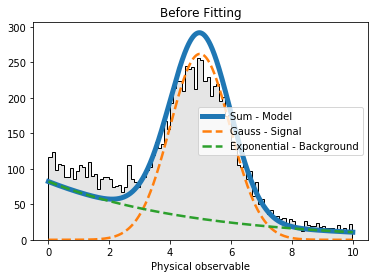

In [18]:
plt.figure()
plt.title("Before Fitting")
# plot the data
plt.hist(data_np, color=color, bins=n_bins, histtype="stepfilled", alpha=0.1)
plt.hist(data_np, color=color, bins=n_bins, histtype="step")

y = model1.pdf(x).numpy()  # rerun now after the fitting
y_gauss = (gauss1.pdf(x) * frac1).numpy()
y_exp = (exponential1.pdf(x) * (1 - frac1)).numpy()

plt.plot(x, y * plot_scaling, label="Sum - Model", linewidth=linewidth * 2)
plt.plot(x, y_gauss * plot_scaling, '--', label="Gauss - Signal", linewidth=linewidth)
plt.plot(x, y_exp * plot_scaling, '--', label="Exponential - Background", linewidth=linewidth)
plt.xlabel("Physical observable")
plt.legend()

plt.show()

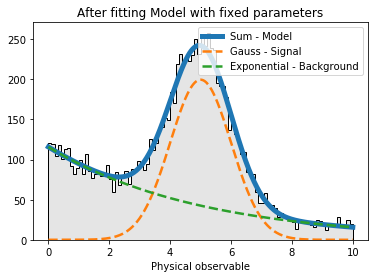

In [8]:
plt.figure()
plt.title("After fitting Model with fixed parameters")
# plot the data
plt.hist(data_np, color=color, bins=n_bins, histtype="stepfilled", alpha=0.1)
plt.hist(data_np, color=color, bins=n_bins, histtype="step")

y = model2.pdf(x).numpy()  # rerun now after the fitting
y_gauss = (gauss2.pdf(x) * frac2).numpy()
y_exp = (exponential2.pdf(x) * (1 - frac2)).numpy()

plt.plot(x, y * plot_scaling, label="Sum - Model", linewidth=linewidth * 2)
plt.plot(x, y_gauss * plot_scaling, '--', label="Gauss - Signal", linewidth=linewidth)
plt.plot(x, y_exp * plot_scaling, '--', label="Exponential - Background", linewidth=linewidth)
plt.xlabel("Physical observable")
plt.legend()

plt.show()

In [16]:
res = []
minimizer = zfit.minimize.Minuit()
for i in range(0,1000):

    data.resample()

    # plot the data
    data_np = data[:, 0].numpy()

    nll1 = zfit.loss.UnbinnedNLL(model=model1, data=data)

    result1 = minimizer.minimize(nll1)
    frac_value = float(value_stat.value())
    value_stat = list(result1.error().keys())[0]
    error_stat = list(result1.error().values())[0]
    frac_up_error = float(error_stat.upper)
    frac_low_error = float(error_stat.lower)
    if(frac_value - frac2.value() > 0):
        frac_error = frac_up_error
    else:
        frac_error = abs(frac_low_error)
    res.append((frac_value - frac2.value())/(frac_error))
    print(frac_value)

    

------------------------------------------------------------------
| FCN = 2.061E+04               |      Ncalls=47 (47 total)      |
| EDM = 2.5E-05 (Goal: 5E-05)   |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
0.501244482213775
------------------------------------------------------------------
| FCN = 2.057E+04               |      Ncalls=46 (46 total)      |
| EDM = 5.03E-05 (Goal: 5E-05)  |           

0.49898694131101834
------------------------------------------------------------------
| FCN = 2.058E+04               |      Ncalls=47 (47 total)      |
| EDM = 1.33E-06 (Goal: 5E-05)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
0.5026421324330861
------------------------------------------------------------------
| FCN = 2.051E+04               |      Ncalls=48 (48 total)      |
| EDM = 9.19E-05 (Goal:

0.4882008436343023
------------------------------------------------------------------
| FCN = 2.054E+04               |      Ncalls=47 (47 total)      |
| EDM = 4.41E-06 (Goal: 5E-05)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
0.5263144919741406
------------------------------------------------------------------
| FCN = 2.059E+04               |      Ncalls=48 (48 total)      |
| EDM = 1.54E-06 (Goal: 

0.4952216590525223
------------------------------------------------------------------
| FCN = 2.066E+04               |      Ncalls=48 (48 total)      |
| EDM = 1.12E-06 (Goal: 5E-05)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
0.5017545312139271
------------------------------------------------------------------
| FCN = 2.063E+04               |      Ncalls=48 (48 total)      |
| EDM = 5.66E-05 (Goal: 

0.5022361111269442
------------------------------------------------------------------
| FCN = 2.079E+04               |      Ncalls=47 (47 total)      |
| EDM = 2.28E-06 (Goal: 5E-05)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
0.4883917357141315
------------------------------------------------------------------
| FCN = 2.06E+04                |      Ncalls=47 (47 total)      |
| EDM = 4.57E-06 (Goal: 

0.48938885206822763
------------------------------------------------------------------
| FCN = 2.063E+04               |      Ncalls=46 (46 total)      |
| EDM = 5.61E-05 (Goal: 5E-05)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
0.5038975777925551
------------------------------------------------------------------
| FCN = 2.069E+04               |      Ncalls=49 (49 total)      |
| EDM = 1.18E-06 (Goal:

0.4923178799133311
------------------------------------------------------------------
| FCN = 2.079E+04               |      Ncalls=48 (48 total)      |
| EDM = 4.38E-06 (Goal: 5E-05)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
0.4705985136229556
------------------------------------------------------------------
| FCN = 2.071E+04               |      Ncalls=46 (46 total)      |
| EDM = 0.000542 (Goal: 

0.49426364162417386
------------------------------------------------------------------
| FCN = 2.063E+04               |      Ncalls=49 (49 total)      |
| EDM = 2.17E-05 (Goal: 5E-05)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
0.48928315991508126
------------------------------------------------------------------
| FCN = 2.073E+04               |      Ncalls=50 (50 total)      |
| EDM = 1.28E-05 (Goal

0.5006305476621317
------------------------------------------------------------------
| FCN = 2.071E+04               |      Ncalls=49 (49 total)      |
| EDM = 3.79E-05 (Goal: 5E-05)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
0.49323222125017674
------------------------------------------------------------------
| FCN = 2.06E+04                |      Ncalls=46 (46 total)      |
| EDM = 0.000934 (Goal:

0.49059514156225714
------------------------------------------------------------------
| FCN = 2.058E+04               |      Ncalls=47 (47 total)      |
| EDM = 8.95E-07 (Goal: 5E-05)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
0.5037016766157161
------------------------------------------------------------------
| FCN = 2.06E+04                |      Ncalls=46 (46 total)      |
| EDM = 0.000292 (Goal:

0.4913434758900336
------------------------------------------------------------------
| FCN = 2.055E+04               |      Ncalls=47 (47 total)      |
| EDM = 1.11E-06 (Goal: 5E-05)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
0.5126385524754676
------------------------------------------------------------------
| FCN = 2.063E+04               |      Ncalls=47 (47 total)      |
| EDM = 2.27E-06 (Goal: 

0.4995864185777241
------------------------------------------------------------------
| FCN = 2.066E+04               |      Ncalls=49 (49 total)      |
| EDM = 3.13E-06 (Goal: 5E-05)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
0.49880835482465014
------------------------------------------------------------------
| FCN = 2.061E+04               |      Ncalls=46 (46 total)      |
| EDM = 0.000285 (Goal:

0.5095514920128146
------------------------------------------------------------------
| FCN = 2.067E+04               |      Ncalls=46 (46 total)      |
| EDM = 3.55E-05 (Goal: 5E-05)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
0.4940953580307563
------------------------------------------------------------------
| FCN = 2.062E+04               |      Ncalls=48 (48 total)      |
| EDM = 9.09E-08 (Goal: 

0.49787170048717977
------------------------------------------------------------------
| FCN = 2.071E+04               |      Ncalls=49 (49 total)      |
| EDM = 2.64E-05 (Goal: 5E-05)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
0.4874865958990376
------------------------------------------------------------------
| FCN = 2.07E+04                |      Ncalls=48 (48 total)      |
| EDM = 0.000132 (Goal:

0.49566838293365384
------------------------------------------------------------------
| FCN = 2.063E+04               |      Ncalls=47 (47 total)      |
| EDM = 8.89E-07 (Goal: 5E-05)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
0.5069349073066923
------------------------------------------------------------------
| FCN = 2.073E+04               |      Ncalls=47 (47 total)      |
| EDM = 2.29E-06 (Goal:

0.5146927342516654
------------------------------------------------------------------
| FCN = 2.069E+04               |      Ncalls=48 (48 total)      |
| EDM = 6.3E-06 (Goal: 5E-05)   |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
0.4927554922244717
------------------------------------------------------------------
| FCN = 2.061E+04               |      Ncalls=47 (47 total)      |
| EDM = 2.57E-06 (Goal: 

0.4980649043777389
------------------------------------------------------------------
| FCN = 2.061E+04               |      Ncalls=48 (48 total)      |
| EDM = 0.000734 (Goal: 5E-05)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
0.501606132972416
------------------------------------------------------------------
| FCN = 2.062E+04               |      Ncalls=47 (47 total)      |
| EDM = 2.55E-06 (Goal: 5

0.4977504237748592
------------------------------------------------------------------
| FCN = 2.063E+04               |      Ncalls=46 (46 total)      |
| EDM = 0.000469 (Goal: 5E-05)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
0.5035744685801453
------------------------------------------------------------------
| FCN = 2.064E+04               |      Ncalls=50 (50 total)      |
| EDM = 1.62E-06 (Goal: 

0.49703727905629624
------------------------------------------------------------------
| FCN = 2.067E+04               |      Ncalls=49 (49 total)      |
| EDM = 2.01E-06 (Goal: 5E-05)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
0.5103713293401506
------------------------------------------------------------------
| FCN = 2.058E+04               |      Ncalls=47 (47 total)      |
| EDM = 3.91E-06 (Goal:

0.5000374311867521
------------------------------------------------------------------
| FCN = 2.061E+04               |      Ncalls=49 (49 total)      |
| EDM = 3.84E-05 (Goal: 5E-05)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
0.4880271633852805
------------------------------------------------------------------
| FCN = 2.06E+04                |      Ncalls=47 (47 total)      |
| EDM = 1.04E-05 (Goal: 

0.5068461500707153
------------------------------------------------------------------
| FCN = 2.068E+04               |      Ncalls=49 (49 total)      |
| EDM = 2.88E-06 (Goal: 5E-05)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
0.5028961152106074
------------------------------------------------------------------
| FCN = 2.075E+04               |      Ncalls=47 (47 total)      |
| EDM = 2.34E-05 (Goal: 

0.5010588805815706
------------------------------------------------------------------
| FCN = 2.065E+04               |      Ncalls=46 (46 total)      |
| EDM = 5.81E-05 (Goal: 5E-05)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
0.49648934364818154
------------------------------------------------------------------
| FCN = 2.069E+04               |      Ncalls=49 (49 total)      |
| EDM = 5.54E-05 (Goal:

0.4948978389258627
------------------------------------------------------------------
| FCN = 2.069E+04               |      Ncalls=47 (47 total)      |
| EDM = 1.07E-05 (Goal: 5E-05)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
0.501075766062559
------------------------------------------------------------------
| FCN = 2.064E+04               |      Ncalls=47 (47 total)      |
| EDM = 6.72E-07 (Goal: 5

0.5050849145024481
------------------------------------------------------------------
| FCN = 2.077E+04               |      Ncalls=48 (48 total)      |
| EDM = 6.85E-07 (Goal: 5E-05)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
0.48151612212571077
------------------------------------------------------------------
| FCN = 2.076E+04               |      Ncalls=47 (47 total)      |
| EDM = 1.01E-06 (Goal:

0.4967648591104498
------------------------------------------------------------------
| FCN = 2.065E+04               |      Ncalls=48 (48 total)      |
| EDM = 6.38E-05 (Goal: 5E-05)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
0.5024283916561568
------------------------------------------------------------------
| FCN = 2.054E+04               |      Ncalls=46 (46 total)      |
| EDM = 0.000683 (Goal: 

0.5091465277455051
------------------------------------------------------------------
| FCN = 2.065E+04               |      Ncalls=47 (47 total)      |
| EDM = 3.47E-06 (Goal: 5E-05)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
0.5058692685666385
------------------------------------------------------------------
| FCN = 2.065E+04               |      Ncalls=51 (51 total)      |
| EDM = 1.62E-05 (Goal: 

0.49772720936174986
------------------------------------------------------------------
| FCN = 2.068E+04               |      Ncalls=48 (48 total)      |
| EDM = 0.00097 (Goal: 5E-05)   |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
0.49612175532694913
------------------------------------------------------------------
| FCN = 2.06E+04                |      Ncalls=46 (46 total)      |
| EDM = 9.99E-05 (Goal

0.4919816451839217
------------------------------------------------------------------
| FCN = 2.051E+04               |      Ncalls=47 (47 total)      |
| EDM = 2.29E-06 (Goal: 5E-05)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
0.517302987758357
------------------------------------------------------------------
| FCN = 2.069E+04               |      Ncalls=47 (47 total)      |
| EDM = 2.32E-05 (Goal: 5

0.49338056148103215
------------------------------------------------------------------
| FCN = 2.065E+04               |      Ncalls=46 (46 total)      |
| EDM = 0.000705 (Goal: 5E-05)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
0.49856739158046814
------------------------------------------------------------------
| FCN = 2.068E+04               |      Ncalls=46 (46 total)      |
| EDM = 0.000172 (Goal

0.49274361682807083
------------------------------------------------------------------
| FCN = 2.06E+04                |      Ncalls=46 (46 total)      |
| EDM = 0.000309 (Goal: 5E-05)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
0.5004286852899035
------------------------------------------------------------------
| FCN = 2.055E+04               |      Ncalls=48 (48 total)      |
| EDM = 5.05E-06 (Goal:

0.5022770110624787
------------------------------------------------------------------
| FCN = 2.062E+04               |      Ncalls=49 (49 total)      |
| EDM = 3.64E-06 (Goal: 5E-05)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
0.5077056590042919
------------------------------------------------------------------
| FCN = 2.066E+04               |      Ncalls=48 (48 total)      |
| EDM = 7.39E-07 (Goal: 

0.49517047410623466
------------------------------------------------------------------
| FCN = 2.059E+04               |      Ncalls=47 (47 total)      |
| EDM = 2.48E-06 (Goal: 5E-05)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
0.5079028735198245
------------------------------------------------------------------
| FCN = 2.07E+04                |      Ncalls=46 (46 total)      |
| EDM = 0.000402 (Goal:

0.5052399379828347
------------------------------------------------------------------
| FCN = 2.059E+04               |      Ncalls=46 (46 total)      |
| EDM = 0.000797 (Goal: 5E-05)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
0.5097062833790424
------------------------------------------------------------------
| FCN = 2.062E+04               |      Ncalls=47 (47 total)      |
| EDM = 9.45E-07 (Goal: 

0.5076946273354328
------------------------------------------------------------------
| FCN = 2.061E+04               |      Ncalls=49 (49 total)      |
| EDM = 2.5E-06 (Goal: 5E-05)   |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
0.499662080264594
------------------------------------------------------------------
| FCN = 2.057E+04               |      Ncalls=46 (46 total)      |
| EDM = 0.000183 (Goal: 5

0.5179145406006189
------------------------------------------------------------------
| FCN = 2.063E+04               |      Ncalls=46 (46 total)      |
| EDM = 0.000498 (Goal: 5E-05)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
0.5037309393242422
------------------------------------------------------------------
| FCN = 2.061E+04               |      Ncalls=46 (46 total)      |
| EDM = 0.000133 (Goal: 

0.5065218159944919
------------------------------------------------------------------
| FCN = 2.065E+04               |      Ncalls=49 (49 total)      |
| EDM = 5.96E-06 (Goal: 5E-05)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
0.4950565919064103
------------------------------------------------------------------
| FCN = 2.061E+04               |      Ncalls=48 (48 total)      |
| EDM = 0.000297 (Goal: 

0.4966747064076708
------------------------------------------------------------------
| FCN = 2.077E+04               |      Ncalls=47 (47 total)      |
| EDM = 1.18E-05 (Goal: 5E-05)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
0.4744779545736166
------------------------------------------------------------------
| FCN = 2.063E+04               |      Ncalls=47 (47 total)      |
| EDM = 1.29E-05 (Goal: 

0.5080828079425085
------------------------------------------------------------------
| FCN = 2.071E+04               |      Ncalls=47 (47 total)      |
| EDM = 9.11E-07 (Goal: 5E-05)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
0.49083816242939704
------------------------------------------------------------------
| FCN = 2.074E+04               |      Ncalls=49 (49 total)      |
| EDM = 9.59E-06 (Goal:

0.4847059263706158
------------------------------------------------------------------
| FCN = 2.074E+04               |      Ncalls=50 (50 total)      |
| EDM = 4.96E-05 (Goal: 5E-05)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
0.4879876419740256
------------------------------------------------------------------
| FCN = 2.064E+04               |      Ncalls=48 (48 total)      |
| EDM = 0.000699 (Goal: 

0.48697034721257304
------------------------------------------------------------------
| FCN = 2.072E+04               |      Ncalls=49 (49 total)      |
| EDM = 2.26E-06 (Goal: 5E-05)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
0.49466345163487496
------------------------------------------------------------------
| FCN = 2.065E+04               |      Ncalls=46 (46 total)      |
| EDM = 0.000429 (Goal

0.5028149333014962
------------------------------------------------------------------
| FCN = 2.072E+04               |      Ncalls=47 (47 total)      |
| EDM = 8.46E-06 (Goal: 5E-05)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
0.48641909832807323
------------------------------------------------------------------
| FCN = 2.068E+04               |      Ncalls=49 (49 total)      |
| EDM = 2.53E-06 (Goal:

0.4974287218163569
------------------------------------------------------------------
| FCN = 2.059E+04               |      Ncalls=46 (46 total)      |
| EDM = 6.13E-05 (Goal: 5E-05)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
0.5077292927884313
------------------------------------------------------------------
| FCN = 2.067E+04               |      Ncalls=47 (47 total)      |
| EDM = 7.65E-06 (Goal: 

0.49455950932453596
------------------------------------------------------------------
| FCN = 2.063E+04               |      Ncalls=47 (47 total)      |
| EDM = 4.59E-06 (Goal: 5E-05)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
0.5059570388046988
------------------------------------------------------------------
| FCN = 2.07E+04                |      Ncalls=49 (49 total)      |
| EDM = 8.47E-06 (Goal:

0.4968267654976887
------------------------------------------------------------------
| FCN = 2.052E+04               |      Ncalls=46 (46 total)      |
| EDM = 0.000104 (Goal: 5E-05)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
0.5136190167678345
------------------------------------------------------------------
| FCN = 2.062E+04               |      Ncalls=47 (47 total)      |
| EDM = 2.1E-05 (Goal: 5

0.49282066712067385
------------------------------------------------------------------
| FCN = 2.079E+04               |      Ncalls=47 (47 total)      |
| EDM = 7E-06 (Goal: 5E-05)     |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
0.48438171836452826
------------------------------------------------------------------
| FCN = 2.064E+04               |      Ncalls=47 (47 total)      |
| EDM = 1.06E-05 (Goal

0.5182199694761027
------------------------------------------------------------------
| FCN = 2.077E+04               |      Ncalls=47 (47 total)      |
| EDM = 8.44E-05 (Goal: 5E-05)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
0.49371206956050095
------------------------------------------------------------------
| FCN = 2.067E+04               |      Ncalls=48 (48 total)      |
| EDM = 0.000744 (Goal:

0.5087761849648225
------------------------------------------------------------------
| FCN = 2.069E+04               |      Ncalls=47 (47 total)      |
| EDM = 1.03E-05 (Goal: 5E-05)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
0.49611101421279336
------------------------------------------------------------------
| FCN = 2.069E+04               |      Ncalls=46 (46 total)      |
| EDM = 0.000414 (Goal:

0.49296972356732194
------------------------------------------------------------------
| FCN = 2.064E+04               |      Ncalls=49 (49 total)      |
| EDM = 1.23E-05 (Goal: 5E-05)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
0.4894771474334903
------------------------------------------------------------------
| FCN = 2.063E+04               |      Ncalls=48 (48 total)      |
| EDM = 3.47E-07 (Goal:

0.477856938142843
------------------------------------------------------------------
| FCN = 2.059E+04               |      Ncalls=46 (46 total)      |
| EDM = 0.000366 (Goal: 5E-05)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
0.5090304499323831
------------------------------------------------------------------
| FCN = 2.061E+04               |      Ncalls=46 (46 total)      |
| EDM = 7.89E-05 (Goal: 5

0.5006379614940342
------------------------------------------------------------------
| FCN = 2.056E+04               |      Ncalls=48 (48 total)      |
| EDM = 3.82E-06 (Goal: 5E-05)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
0.5058746223581385
------------------------------------------------------------------
| FCN = 2.055E+04               |      Ncalls=48 (48 total)      |
| EDM = 0.000803 (Goal: 

0.5139096894789225
------------------------------------------------------------------
| FCN = 2.063E+04               |      Ncalls=47 (47 total)      |
| EDM = 5.23E-06 (Goal: 5E-05)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
0.5111628977998999
------------------------------------------------------------------
| FCN = 2.063E+04               |      Ncalls=47 (47 total)      |
| EDM = 5.96E-06 (Goal: 

0.4929003791311072
------------------------------------------------------------------
| FCN = 2.05E+04                |      Ncalls=46 (46 total)      |
| EDM = 0.000588 (Goal: 5E-05)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
0.5139100810285634
------------------------------------------------------------------
| FCN = 2.073E+04               |      Ncalls=48 (48 total)      |
| EDM = 2.01E-06 (Goal: 

0.5019663718987716
------------------------------------------------------------------
| FCN = 2.054E+04               |      Ncalls=47 (47 total)      |
| EDM = 1.56E-06 (Goal: 5E-05)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
0.5186593092247813
------------------------------------------------------------------
| FCN = 2.062E+04               |      Ncalls=46 (46 total)      |
| EDM = 7.89E-05 (Goal: 

0.5182852147515734
------------------------------------------------------------------
| FCN = 2.064E+04               |      Ncalls=88 (88 total)      |
| EDM = 3.48E-06 (Goal: 5E-05)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
0.4981251996912579
------------------------------------------------------------------
| FCN = 2.072E+04               |      Ncalls=48 (48 total)      |
| EDM = 6.07E-07 (Goal: 

0.500978636096814
------------------------------------------------------------------
| FCN = 2.067E+04               |      Ncalls=47 (47 total)      |
| EDM = 1.17E-06 (Goal: 5E-05)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
0.4997710526920342
------------------------------------------------------------------
| FCN = 2.069E+04               |      Ncalls=49 (49 total)      |
| EDM = 8.78E-07 (Goal: 5

0.49639080298307264
------------------------------------------------------------------
| FCN = 2.075E+04               |      Ncalls=47 (47 total)      |
| EDM = 5.48E-06 (Goal: 5E-05)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
0.4815423799150486
------------------------------------------------------------------
| FCN = 2.073E+04               |      Ncalls=48 (48 total)      |
| EDM = 2.96E-06 (Goal:

0.5035043662607046
------------------------------------------------------------------
| FCN = 2.074E+04               |      Ncalls=47 (47 total)      |
| EDM = 3.75E-06 (Goal: 5E-05)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
0.48772005710788735
------------------------------------------------------------------
| FCN = 2.059E+04               |      Ncalls=47 (47 total)      |
| EDM = 1.91E-06 (Goal:

0.4936767473515303
------------------------------------------------------------------
| FCN = 2.078E+04               |      Ncalls=47 (47 total)      |
| EDM = 9.67E-07 (Goal: 5E-05)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
0.4883995670549076
------------------------------------------------------------------
| FCN = 2.055E+04               |      Ncalls=46 (46 total)      |
| EDM = 0.0001 (Goal: 5E

0.5017866207777782
------------------------------------------------------------------
| FCN = 2.057E+04               |      Ncalls=49 (49 total)      |
| EDM = 4.58E-06 (Goal: 5E-05)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
0.5078174543487423
------------------------------------------------------------------
| FCN = 2.062E+04               |      Ncalls=47 (47 total)      |
| EDM = 0.000125 (Goal: 

0.5049151172670276
------------------------------------------------------------------
| FCN = 2.068E+04               |      Ncalls=46 (46 total)      |
| EDM = 0.00078 (Goal: 5E-05)   |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
0.507653873179815
------------------------------------------------------------------
| FCN = 2.074E+04               |      Ncalls=48 (48 total)      |
| EDM = 8.85E-08 (Goal: 5

0.494500726549003
------------------------------------------------------------------
| FCN = 2.065E+04               |      Ncalls=48 (48 total)      |
| EDM = 2.4E-06 (Goal: 5E-05)   |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
0.516711440860035
------------------------------------------------------------------
| FCN = 2.065E+04               |      Ncalls=48 (48 total)      |
| EDM = 1.91E-07 (Goal: 5E

0.5028158757527771
------------------------------------------------------------------
| FCN = 2.068E+04               |      Ncalls=47 (47 total)      |
| EDM = 2.02E-06 (Goal: 5E-05)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
0.496741699379226
------------------------------------------------------------------
| FCN = 2.071E+04               |      Ncalls=46 (46 total)      |
| EDM = 2.17E-05 (Goal: 5

0.492768566826043
------------------------------------------------------------------
| FCN = 2.065E+04               |      Ncalls=48 (48 total)      |
| EDM = 2.75E-05 (Goal: 5E-05)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
0.48965593538150687
------------------------------------------------------------------
| FCN = 2.061E+04               |      Ncalls=47 (47 total)      |
| EDM = 1.07E-05 (Goal: 

0.4973242555781901
------------------------------------------------------------------
| FCN = 2.054E+04               |      Ncalls=47 (47 total)      |
| EDM = 1.65E-06 (Goal: 5E-05)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
0.5226581204868794
------------------------------------------------------------------
| FCN = 2.067E+04               |      Ncalls=48 (48 total)      |
| EDM = 4.3E-07 (Goal: 5

0.4941461357309415
------------------------------------------------------------------
| FCN = 2.062E+04               |      Ncalls=47 (47 total)      |
| EDM = 2.27E-06 (Goal: 5E-05)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
0.5006884232409444
------------------------------------------------------------------
| FCN = 2.064E+04               |      Ncalls=46 (46 total)      |
| EDM = 1.54E-05 (Goal: 

0.5014546858229342
------------------------------------------------------------------
| FCN = 2.06E+04                |      Ncalls=47 (47 total)      |
| EDM = 1.17E-05 (Goal: 5E-05)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
0.5034547906463085
------------------------------------------------------------------
| FCN = 2.062E+04               |      Ncalls=49 (49 total)      |
| EDM = 1.55E-06 (Goal: 

0.49738568395744487
------------------------------------------------------------------
| FCN = 2.071E+04               |      Ncalls=47 (47 total)      |
| EDM = 1.21E-06 (Goal: 5E-05)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
0.4917798353549546
------------------------------------------------------------------
| FCN = 2.064E+04               |      Ncalls=46 (46 total)      |
| EDM = 3.61E-05 (Goal:

0.49742101127990296
------------------------------------------------------------------
| FCN = 2.06E+04                |      Ncalls=48 (48 total)      |
| EDM = 0.000378 (Goal: 5E-05)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
0.5037102246188829
------------------------------------------------------------------
| FCN = 2.06E+04                |      Ncalls=47 (47 total)      |
| EDM = 1.27E-05 (Goal:

0.4985109193478349
------------------------------------------------------------------
| FCN = 2.07E+04                |      Ncalls=48 (48 total)      |
| EDM = 9.23E-06 (Goal: 5E-05)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
0.49707953564256635
------------------------------------------------------------------
| FCN = 2.064E+04               |      Ncalls=47 (47 total)      |
| EDM = 1.14E-06 (Goal:

0.49661162544335674
------------------------------------------------------------------
| FCN = 2.053E+04               |      Ncalls=46 (46 total)      |
| EDM = 2.01E-06 (Goal: 5E-05)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
0.5170680673057221
------------------------------------------------------------------
| FCN = 2.048E+04               |      Ncalls=47 (47 total)      |
| EDM = 7.34E-06 (Goal:

0.5032886368418504
------------------------------------------------------------------
| FCN = 2.058E+04               |      Ncalls=46 (46 total)      |
| EDM = 6.43E-05 (Goal: 5E-05)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
0.5123593928812027
------------------------------------------------------------------
| FCN = 2.06E+04                |      Ncalls=47 (47 total)      |
| EDM = 6.98E-06 (Goal: 

0.4972634616139593
------------------------------------------------------------------
| FCN = 2.058E+04               |      Ncalls=46 (46 total)      |
| EDM = 0.000105 (Goal: 5E-05)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
0.49336396213306905
------------------------------------------------------------------
| FCN = 2.061E+04               |      Ncalls=47 (47 total)      |
| EDM = 6.53E-06 (Goal:

0.502257039433905
------------------------------------------------------------------
| FCN = 2.071E+04               |      Ncalls=47 (47 total)      |
| EDM = 1.28E-06 (Goal: 5E-05)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
0.5093057200995349
------------------------------------------------------------------
| FCN = 2.056E+04               |      Ncalls=50 (50 total)      |
| EDM = 1.04E-05 (Goal: 5

0.5056197331891311
------------------------------------------------------------------
| FCN = 2.078E+04               |      Ncalls=47 (47 total)      |
| EDM = 4.43E-06 (Goal: 5E-05)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
0.4865982659924002
------------------------------------------------------------------
| FCN = 2.067E+04               |      Ncalls=47 (47 total)      |
| EDM = 4.9E-06 (Goal: 5

0.5138275439150112
------------------------------------------------------------------
| FCN = 2.064E+04               |      Ncalls=49 (49 total)      |
| EDM = 1.22E-06 (Goal: 5E-05)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
0.509517017379475
------------------------------------------------------------------
| FCN = 2.071E+04               |      Ncalls=48 (48 total)      |
| EDM = 1.53E-06 (Goal: 5

0.4946598669685244
------------------------------------------------------------------
| FCN = 2.071E+04               |      Ncalls=47 (47 total)      |
| EDM = 3.46E-06 (Goal: 5E-05)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
0.48695327404854544
------------------------------------------------------------------
| FCN = 2.069E+04               |      Ncalls=47 (47 total)      |
| EDM = 1.63E-06 (Goal:

0.5095209185568342
------------------------------------------------------------------
| FCN = 2.073E+04               |      Ncalls=50 (50 total)      |
| EDM = 0.000154 (Goal: 5E-05)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
0.4886005935940571
------------------------------------------------------------------
| FCN = 2.051E+04               |      Ncalls=47 (47 total)      |
| EDM = 7.04E-06 (Goal: 

0.4933555151812179
------------------------------------------------------------------
| FCN = 2.067E+04               |      Ncalls=47 (47 total)      |
| EDM = 1.47E-05 (Goal: 5E-05)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
0.5073517363998621
------------------------------------------------------------------
| FCN = 2.062E+04               |      Ncalls=49 (49 total)      |
| EDM = 5.91E-06 (Goal: 

0.49242110866336214
------------------------------------------------------------------
| FCN = 2.065E+04               |      Ncalls=49 (49 total)      |
| EDM = 1.57E-06 (Goal: 5E-05)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
0.49968440625537236
------------------------------------------------------------------
| FCN = 2.062E+04               |      Ncalls=46 (46 total)      |
| EDM = 0.000883 (Goal

0.4844764248361655
------------------------------------------------------------------
| FCN = 2.066E+04               |      Ncalls=48 (48 total)      |
| EDM = 1.27E-06 (Goal: 5E-05)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
0.5036047979475621
------------------------------------------------------------------
| FCN = 2.067E+04               |      Ncalls=46 (46 total)      |
| EDM = 0.000536 (Goal: 

0.5076742211107954
------------------------------------------------------------------
| FCN = 2.061E+04               |      Ncalls=48 (48 total)      |
| EDM = 2.73E-06 (Goal: 5E-05)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
0.5179135113995674
------------------------------------------------------------------
| FCN = 2.069E+04               |      Ncalls=47 (47 total)      |
| EDM = 1.04E-05 (Goal: 

0.48470407494248424
------------------------------------------------------------------
| FCN = 2.068E+04               |      Ncalls=46 (46 total)      |
| EDM = 0.000146 (Goal: 5E-05)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
0.49867909829780604
------------------------------------------------------------------
| FCN = 2.064E+04               |      Ncalls=47 (47 total)      |
| EDM = 1.16E-06 (Goal

0.49015230042876046
------------------------------------------------------------------
| FCN = 2.059E+04               |      Ncalls=47 (47 total)      |
| EDM = 1.82E-05 (Goal: 5E-05)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
0.4968263778891794
------------------------------------------------------------------
| FCN = 2.062E+04               |      Ncalls=48 (48 total)      |
| EDM = 0.000548 (Goal:

0.49921606609826946
------------------------------------------------------------------
| FCN = 2.061E+04               |      Ncalls=50 (50 total)      |
| EDM = 5.44E-07 (Goal: 5E-05)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
0.507354462198601
------------------------------------------------------------------
| FCN = 2.06E+04                |      Ncalls=48 (48 total)      |
| EDM = 0.000607 (Goal: 

0.4834651614973881
------------------------------------------------------------------
| FCN = 2.068E+04               |      Ncalls=48 (48 total)      |
| EDM = 0.000252 (Goal: 5E-05)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
0.49204721580104177
------------------------------------------------------------------
| FCN = 2.061E+04               |      Ncalls=47 (47 total)      |
| EDM = 2.28E-06 (Goal:

0.4943375659744892
------------------------------------------------------------------
| FCN = 2.067E+04               |      Ncalls=47 (47 total)      |
| EDM = 6.45E-05 (Goal: 5E-05)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
0.4943362020660008
------------------------------------------------------------------
| FCN = 2.068E+04               |      Ncalls=47 (47 total)      |
| EDM = 6.44E-07 (Goal: 

0.498175767875255
------------------------------------------------------------------
| FCN = 2.062E+04               |      Ncalls=50 (50 total)      |
| EDM = 6.63E-06 (Goal: 5E-05)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
0.49585119883152706
------------------------------------------------------------------
| FCN = 2.065E+04               |      Ncalls=47 (47 total)      |
| EDM = 1E-06 (Goal: 5E-

0.5069186660035019
------------------------------------------------------------------
| FCN = 2.067E+04               |      Ncalls=50 (50 total)      |
| EDM = 3.1E-07 (Goal: 5E-05)   |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
0.49376247127586187
------------------------------------------------------------------
| FCN = 2.072E+04               |      Ncalls=47 (47 total)      |
| EDM = 2.39E-05 (Goal:

0.5068568579761472
------------------------------------------------------------------
| FCN = 2.054E+04               |      Ncalls=48 (48 total)      |
| EDM = 1.93E-05 (Goal: 5E-05)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
0.512260979718498
------------------------------------------------------------------
| FCN = 2.075E+04               |      Ncalls=48 (48 total)      |
| EDM = 9.78E-06 (Goal: 5

0.49727005296940197
------------------------------------------------------------------
| FCN = 2.065E+04               |      Ncalls=48 (48 total)      |
| EDM = 0.000852 (Goal: 5E-05)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
0.49206786007973546
------------------------------------------------------------------
| FCN = 2.063E+04               |      Ncalls=47 (47 total)      |
| EDM = 1.38E-06 (Goal

0.5042543439648759
------------------------------------------------------------------
| FCN = 2.055E+04               |      Ncalls=47 (47 total)      |
| EDM = 3.14E-06 (Goal: 5E-05)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
0.5107863290689102
------------------------------------------------------------------
| FCN = 2.066E+04               |      Ncalls=47 (47 total)      |
| EDM = 2.09E-06 (Goal: 

0.497388372715418
------------------------------------------------------------------
| FCN = 2.053E+04               |      Ncalls=47 (47 total)      |
| EDM = 2.1E-05 (Goal: 5E-05)   |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
0.504173042014895
------------------------------------------------------------------
| FCN = 2.053E+04               |      Ncalls=47 (47 total)      |
| EDM = 2.59E-06 (Goal: 5E

0.49334545121072787
------------------------------------------------------------------
| FCN = 2.066E+04               |      Ncalls=47 (47 total)      |
| EDM = 1.55E-06 (Goal: 5E-05)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
0.4915372194496996
------------------------------------------------------------------
| FCN = 2.069E+04               |      Ncalls=47 (47 total)      |
| EDM = 3.48E-05 (Goal:

0.5040441560995879
------------------------------------------------------------------
| FCN = 2.063E+04               |      Ncalls=48 (48 total)      |
| EDM = 0.00022 (Goal: 5E-05)   |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
0.49887126182463076
------------------------------------------------------------------
| FCN = 2.071E+04               |      Ncalls=46 (46 total)      |
| EDM = 0.000524 (Goal:

0.5062862480088631
------------------------------------------------------------------
| FCN = 2.053E+04               |      Ncalls=49 (49 total)      |
| EDM = 1.67E-06 (Goal: 5E-05)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
0.5030028813378932
------------------------------------------------------------------
| FCN = 2.074E+04               |      Ncalls=47 (47 total)      |
| EDM = 1.42E-05 (Goal: 

0.5095541393605808
------------------------------------------------------------------
| FCN = 2.073E+04               |      Ncalls=47 (47 total)      |
| EDM = 1.1E-06 (Goal: 5E-05)   |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
0.4843278116157025
------------------------------------------------------------------
| FCN = 2.063E+04               |      Ncalls=46 (46 total)      |
| EDM = 2.57E-05 (Goal: 

0.48837850381130227
------------------------------------------------------------------
| FCN = 2.06E+04                |      Ncalls=47 (47 total)      |
| EDM = 8.3E-06 (Goal: 5E-05)   |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
0.5100768927154039
------------------------------------------------------------------
| FCN = 2.069E+04               |      Ncalls=47 (47 total)      |
| EDM = 2.16E-06 (Goal:

0.5043601382749813
------------------------------------------------------------------
| FCN = 2.064E+04               |      Ncalls=46 (46 total)      |
| EDM = 0.000897 (Goal: 5E-05)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
0.4949080254026776
------------------------------------------------------------------
| FCN = 2.063E+04               |      Ncalls=47 (47 total)      |
| EDM = 1.78E-06 (Goal: 

0.5092933638586143
------------------------------------------------------------------
| FCN = 2.058E+04               |      Ncalls=49 (49 total)      |
| EDM = 2.44E-06 (Goal: 5E-05)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
0.5088582975563287
------------------------------------------------------------------
| FCN = 2.063E+04               |      Ncalls=47 (47 total)      |
| EDM = 1.05E-06 (Goal: 

0.4799118572852276
------------------------------------------------------------------
| FCN = 2.063E+04               |      Ncalls=47 (47 total)      |
| EDM = 4.83E-06 (Goal: 5E-05)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
0.5032929336820012
------------------------------------------------------------------
| FCN = 2.07E+04                |      Ncalls=47 (47 total)      |
| EDM = 3.73E-06 (Goal: 

0.49385975282359657
------------------------------------------------------------------
| FCN = 2.076E+04               |      Ncalls=50 (50 total)      |
| EDM = 7.69E-06 (Goal: 5E-05)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
0.49694776764433957
------------------------------------------------------------------
| FCN = 2.06E+04                |      Ncalls=47 (47 total)      |
| EDM = 2.99E-06 (Goal

0.4951242489333994
------------------------------------------------------------------
| FCN = 2.061E+04               |      Ncalls=46 (46 total)      |
| EDM = 2.1E-06 (Goal: 5E-05)   |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
0.5027197211401204
------------------------------------------------------------------
| FCN = 2.061E+04               |      Ncalls=47 (47 total)      |
| EDM = 7.14E-06 (Goal: 

0.4858125019983559
------------------------------------------------------------------
| FCN = 2.068E+04               |      Ncalls=48 (48 total)      |
| EDM = 7.35E-07 (Goal: 5E-05)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
0.48086710123057913
------------------------------------------------------------------
| FCN = 2.068E+04               |      Ncalls=47 (47 total)      |
| EDM = 7.56E-06 (Goal:

0.496833759631881
------------------------------------------------------------------
| FCN = 2.062E+04               |      Ncalls=50 (50 total)      |
| EDM = 3.87E-08 (Goal: 5E-05)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
0.5126129106273514
------------------------------------------------------------------
| FCN = 2.057E+04               |      Ncalls=49 (49 total)      |
| EDM = 1.43E-06 (Goal: 5

0.4848750695728829
------------------------------------------------------------------
| FCN = 2.067E+04               |      Ncalls=47 (47 total)      |
| EDM = 9.48E-06 (Goal: 5E-05)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
0.4970375335096812
------------------------------------------------------------------
| FCN = 2.05E+04                |      Ncalls=47 (47 total)      |
| EDM = 7.61E-07 (Goal: 

0.48966157925134607
------------------------------------------------------------------
| FCN = 2.069E+04               |      Ncalls=49 (49 total)      |
| EDM = 2.45E-06 (Goal: 5E-05)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
0.4921402523142148
------------------------------------------------------------------
| FCN = 2.064E+04               |      Ncalls=47 (47 total)      |
| EDM = 0.000211 (Goal:

0.49031603220509257
------------------------------------------------------------------
| FCN = 2.056E+04               |      Ncalls=46 (46 total)      |
| EDM = 0.000537 (Goal: 5E-05)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
0.501411707241847
------------------------------------------------------------------
| FCN = 2.059E+04               |      Ncalls=47 (47 total)      |
| EDM = 4.4E-06 (Goal: 5

0.4928094943367919
------------------------------------------------------------------
| FCN = 2.07E+04                |      Ncalls=47 (47 total)      |
| EDM = 4.56E-06 (Goal: 5E-05)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
0.5003010376210112
------------------------------------------------------------------
| FCN = 2.064E+04               |      Ncalls=48 (48 total)      |
| EDM = 0.000547 (Goal: 

0.5070201345519352
------------------------------------------------------------------
| FCN = 2.063E+04               |      Ncalls=48 (48 total)      |
| EDM = 0.000863 (Goal: 5E-05)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
0.5073225426479875
------------------------------------------------------------------
| FCN = 2.067E+04               |      Ncalls=47 (47 total)      |
| EDM = 1.75E-06 (Goal: 

0.4884777369334134
------------------------------------------------------------------
| FCN = 2.06E+04                |      Ncalls=47 (47 total)      |
| EDM = 3.85E-06 (Goal: 5E-05)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
0.5152606918355906
------------------------------------------------------------------
| FCN = 2.054E+04               |      Ncalls=49 (49 total)      |
| EDM = 1.74E-06 (Goal: 

0.49733545333009654
------------------------------------------------------------------
| FCN = 2.066E+04               |      Ncalls=47 (47 total)      |
| EDM = 3.73E-06 (Goal: 5E-05)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
0.492628414714242
------------------------------------------------------------------
| FCN = 2.063E+04               |      Ncalls=48 (48 total)      |
| EDM = 9.22E-05 (Goal: 

0.4937578020642284
------------------------------------------------------------------
| FCN = 2.066E+04               |      Ncalls=47 (47 total)      |
| EDM = 2.08E-06 (Goal: 5E-05)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
0.5001345606276627
------------------------------------------------------------------
| FCN = 2.064E+04               |      Ncalls=48 (48 total)      |
| EDM = 0.000643 (Goal: 

0.5100957532156988
------------------------------------------------------------------
| FCN = 2.068E+04               |      Ncalls=47 (47 total)      |
| EDM = 9.26E-06 (Goal: 5E-05)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
0.4880040363916834
------------------------------------------------------------------
| FCN = 2.068E+04               |      Ncalls=47 (47 total)      |
| EDM = 2.41E-06 (Goal: 

0.5058760132862
------------------------------------------------------------------
| FCN = 2.054E+04               |      Ncalls=48 (48 total)      |
| EDM = 1.96E-06 (Goal: 5E-05)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
0.5026726869407242
------------------------------------------------------------------
| FCN = 2.069E+04               |      Ncalls=47 (47 total)      |
| EDM = 4.72E-06 (Goal: 5E-

0.4837911629099816
------------------------------------------------------------------
| FCN = 2.058E+04               |      Ncalls=47 (47 total)      |
| EDM = 4.67E-06 (Goal: 5E-05)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
0.507763028947971
------------------------------------------------------------------
| FCN = 2.078E+04               |      Ncalls=47 (47 total)      |
| EDM = 5.75E-05 (Goal: 5

0.5073859322359031
------------------------------------------------------------------
| FCN = 2.06E+04                |      Ncalls=47 (47 total)      |
| EDM = 1.65E-06 (Goal: 5E-05)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
0.5001860559855569
------------------------------------------------------------------
| FCN = 2.07E+04                |      Ncalls=47 (47 total)      |
| EDM = 5.27E-07 (Goal: 

0.496724851026352
------------------------------------------------------------------
| FCN = 2.064E+04               |      Ncalls=46 (46 total)      |
| EDM = 0.000508 (Goal: 5E-05)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
0.5012113770964769
------------------------------------------------------------------
| FCN = 2.059E+04               |      Ncalls=47 (47 total)      |
| EDM = 4.9E-07 (Goal: 5E

0.5007151749118197
------------------------------------------------------------------
| FCN = 2.061E+04               |      Ncalls=47 (47 total)      |
| EDM = 1.08E-05 (Goal: 5E-05)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
0.5011310889749382
------------------------------------------------------------------
| FCN = 2.057E+04               |      Ncalls=47 (47 total)      |
| EDM = 2.88E-06 (Goal: 

0.49997049513729763
------------------------------------------------------------------
| FCN = 2.067E+04               |      Ncalls=48 (48 total)      |
| EDM = 1.37E-06 (Goal: 5E-05)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
0.4963582116298443
------------------------------------------------------------------
| FCN = 2.059E+04               |      Ncalls=46 (46 total)      |
| EDM = 0.000476 (Goal:

0.5026396190963531
------------------------------------------------------------------
| FCN = 2.062E+04               |      Ncalls=47 (47 total)      |
| EDM = 5.9E-05 (Goal: 5E-05)   |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
0.4994028781529706
------------------------------------------------------------------
| FCN = 2.057E+04               |      Ncalls=48 (48 total)      |
| EDM = 8.93E-06 (Goal: 

0.5108451511667577
------------------------------------------------------------------
| FCN = 2.063E+04               |      Ncalls=47 (47 total)      |
| EDM = 8.44E-06 (Goal: 5E-05)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
0.4953862303416224
------------------------------------------------------------------
| FCN = 2.076E+04               |      Ncalls=47 (47 total)      |
| EDM = 7.18E-06 (Goal: 

0.5116164485654904
------------------------------------------------------------------
| FCN = 2.056E+04               |      Ncalls=47 (47 total)      |
| EDM = 5.85E-05 (Goal: 5E-05)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
0.5152519933806374
------------------------------------------------------------------
| FCN = 2.057E+04               |      Ncalls=46 (46 total)      |
| EDM = 0.000324 (Goal: 

0.48928238614384195
------------------------------------------------------------------
| FCN = 2.057E+04               |      Ncalls=47 (47 total)      |
| EDM = 1.15E-06 (Goal: 5E-05)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
0.5131376578135458
------------------------------------------------------------------
| FCN = 2.072E+04               |      Ncalls=46 (46 total)      |
| EDM = 4.34E-05 (Goal:

0.49924299417383833
------------------------------------------------------------------
| FCN = 2.057E+04               |      Ncalls=48 (48 total)      |
| EDM = 6.12E-06 (Goal: 5E-05)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
0.5148974217540635
------------------------------------------------------------------
| FCN = 2.066E+04               |      Ncalls=46 (46 total)      |
| EDM = 7.69E-05 (Goal:

0.4939255582412521
------------------------------------------------------------------
| FCN = 2.06E+04                |      Ncalls=47 (47 total)      |
| EDM = 1.44E-06 (Goal: 5E-05)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
0.5041294613522552
------------------------------------------------------------------
| FCN = 2.07E+04                |      Ncalls=47 (47 total)      |
| EDM = 4.91E-05 (Goal: 

0.5076501503160878
------------------------------------------------------------------
| FCN = 2.072E+04               |      Ncalls=48 (48 total)      |
| EDM = 5.23E-06 (Goal: 5E-05)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
0.502538959428106
------------------------------------------------------------------
| FCN = 2.063E+04               |      Ncalls=51 (51 total)      |
| EDM = 3.04E-06 (Goal: 5

0.5045890040049493
------------------------------------------------------------------
| FCN = 2.065E+04               |      Ncalls=49 (49 total)      |
| EDM = 2.18E-05 (Goal: 5E-05)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
0.5092443405310147
------------------------------------------------------------------
| FCN = 2.073E+04               |      Ncalls=47 (47 total)      |
| EDM = 2.31E-05 (Goal: 

0.5016241497538025
------------------------------------------------------------------
| FCN = 2.056E+04               |      Ncalls=48 (48 total)      |
| EDM = 7.16E-07 (Goal: 5E-05)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
0.5116551358988349
------------------------------------------------------------------
| FCN = 2.053E+04               |      Ncalls=49 (49 total)      |
| EDM = 1.08E-06 (Goal: 

0.4987741170695089
------------------------------------------------------------------
| FCN = 2.063E+04               |      Ncalls=48 (48 total)      |
| EDM = 6.34E-05 (Goal: 5E-05)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
0.4970404984333052
------------------------------------------------------------------
| FCN = 2.072E+04               |      Ncalls=47 (47 total)      |
| EDM = 3.14E-06 (Goal: 

0.4852637935483972
------------------------------------------------------------------
| FCN = 2.059E+04               |      Ncalls=46 (46 total)      |
| EDM = 0.0001 (Goal: 5E-05)    |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
0.49969177599609266
------------------------------------------------------------------
| FCN = 2.059E+04               |      Ncalls=49 (49 total)      |
| EDM = 1.75E-06 (Goal:

0.49658569761219173
------------------------------------------------------------------
| FCN = 2.081E+04               |      Ncalls=47 (47 total)      |
| EDM = 1.52E-06 (Goal: 5E-05)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
0.4882274720358985
------------------------------------------------------------------
| FCN = 2.062E+04               |      Ncalls=47 (47 total)      |
| EDM = 1.96E-05 (Goal:

0.5079964957133146
------------------------------------------------------------------
| FCN = 2.058E+04               |      Ncalls=47 (47 total)      |
| EDM = 1.16E-05 (Goal: 5E-05)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
0.5170610486863538
------------------------------------------------------------------
| FCN = 2.068E+04               |      Ncalls=47 (47 total)      |
| EDM = 7.02E-06 (Goal: 

0.5108213883697522
------------------------------------------------------------------
| FCN = 2.074E+04               |      Ncalls=46 (46 total)      |
| EDM = 0.000372 (Goal: 5E-05)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
0.48626449932678495
------------------------------------------------------------------
| FCN = 2.071E+04               |      Ncalls=46 (46 total)      |
| EDM = 0.000199 (Goal:

0.47952671481645803
------------------------------------------------------------------
| FCN = 2.06E+04                |      Ncalls=46 (46 total)      |
| EDM = 0.000119 (Goal: 5E-05)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
0.4942270252340025
------------------------------------------------------------------
| FCN = 2.08E+04                |      Ncalls=47 (47 total)      |
| EDM = 1.31E-05 (Goal:

0.5063322979340946
------------------------------------------------------------------
| FCN = 2.064E+04               |      Ncalls=50 (50 total)      |
| EDM = 9.88E-07 (Goal: 5E-05)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
0.4999775545767876
------------------------------------------------------------------
| FCN = 2.065E+04               |      Ncalls=48 (48 total)      |
| EDM = 3.19E-06 (Goal: 

0.5084451836841282
------------------------------------------------------------------
| FCN = 2.072E+04               |      Ncalls=48 (48 total)      |
| EDM = 1.24E-05 (Goal: 5E-05)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
0.49285705262048246
------------------------------------------------------------------
| FCN = 2.062E+04               |      Ncalls=48 (48 total)      |
| EDM = 5.8E-08 (Goal: 

0.4999740862674136
------------------------------------------------------------------
| FCN = 2.051E+04               |      Ncalls=47 (47 total)      |
| EDM = 1.27E-05 (Goal: 5E-05)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
0.5166344884654707
------------------------------------------------------------------
| FCN = 2.063E+04               |      Ncalls=47 (47 total)      |
| EDM = 1.24E-06 (Goal: 

0.49289526096403957
------------------------------------------------------------------
| FCN = 2.053E+04               |      Ncalls=47 (47 total)      |
| EDM = 5.91E-07 (Goal: 5E-05)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
0.5089159955689028
------------------------------------------------------------------
| FCN = 2.057E+04               |      Ncalls=46 (46 total)      |
| EDM = 0.000172 (Goal:

0.5056528865224353
------------------------------------------------------------------
| FCN = 2.06E+04                |      Ncalls=47 (47 total)      |
| EDM = 1.47E-06 (Goal: 5E-05)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
0.502630649905744
------------------------------------------------------------------
| FCN = 2.073E+04               |      Ncalls=47 (47 total)      |
| EDM = 6.25E-05 (Goal: 5

0.4833311729347402
------------------------------------------------------------------
| FCN = 2.064E+04               |      Ncalls=46 (46 total)      |
| EDM = 0.000315 (Goal: 5E-05)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
0.49827401053145987
------------------------------------------------------------------
| FCN = 2.065E+04               |      Ncalls=47 (47 total)      |
| EDM = 0.000201 (Goal:

0.5003398333313307
------------------------------------------------------------------
| FCN = 2.071E+04               |      Ncalls=46 (46 total)      |
| EDM = 6.31E-06 (Goal: 5E-05)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
0.4902064685402653
------------------------------------------------------------------
| FCN = 2.065E+04               |      Ncalls=46 (46 total)      |
| EDM = 1.95E-05 (Goal: 

0.49809970233971934
------------------------------------------------------------------
| FCN = 2.052E+04               |      Ncalls=47 (47 total)      |
| EDM = 6.39E-06 (Goal: 5E-05)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
0.5176177067341099
------------------------------------------------------------------
| FCN = 2.063E+04               |      Ncalls=47 (47 total)      |
| EDM = 4.49E-06 (Goal:

0.5161904770612157
------------------------------------------------------------------
| FCN = 2.059E+04               |      Ncalls=47 (47 total)      |
| EDM = 4.27E-06 (Goal: 5E-05)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
0.5134932099840177
------------------------------------------------------------------
| FCN = 2.066E+04               |      Ncalls=48 (48 total)      |
| EDM = 1.12E-06 (Goal: 

0.4977322613616236
------------------------------------------------------------------
| FCN = 2.068E+04               |      Ncalls=46 (46 total)      |
| EDM = 0.000275 (Goal: 5E-05)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
0.4918401407159905
------------------------------------------------------------------
| FCN = 2.068E+04               |      Ncalls=47 (47 total)      |
| EDM = 8.86E-07 (Goal: 

0.49136352640956804
------------------------------------------------------------------
| FCN = 2.069E+04               |      Ncalls=48 (48 total)      |
| EDM = 5.55E-06 (Goal: 5E-05)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
0.5162803470007161
------------------------------------------------------------------
| FCN = 2.066E+04               |      Ncalls=48 (48 total)      |
| EDM = 7.65E-07 (Goal:

0.49674441055431
------------------------------------------------------------------
| FCN = 2.065E+04               |      Ncalls=46 (46 total)      |
| EDM = 0.000943 (Goal: 5E-05)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
0.5091888793885678
------------------------------------------------------------------
| FCN = 2.083E+04               |      Ncalls=46 (46 total)      |
| EDM = 0.000714 (Goal: 5E

0.49879443051346223
------------------------------------------------------------------
| FCN = 2.071E+04               |      Ncalls=49 (49 total)      |
| EDM = 3.9E-05 (Goal: 5E-05)   |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
0.4989461019744742
------------------------------------------------------------------
| FCN = 2.074E+04               |      Ncalls=47 (47 total)      |
| EDM = 9.73E-06 (Goal:

0.49495775560006744
------------------------------------------------------------------
| FCN = 2.052E+04               |      Ncalls=47 (47 total)      |
| EDM = 6.01E-07 (Goal: 5E-05)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
0.5070854073184083
------------------------------------------------------------------
| FCN = 2.071E+04               |      Ncalls=47 (47 total)      |
| EDM = 2.38E-05 (Goal:

0.49719944896673174
------------------------------------------------------------------
| FCN = 2.068E+04               |      Ncalls=49 (49 total)      |
| EDM = 4.58E-06 (Goal: 5E-05)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
0.49011473991850774
------------------------------------------------------------------
| FCN = 2.065E+04               |      Ncalls=47 (47 total)      |
| EDM = 5.46E-06 (Goal

0.503653151836197
------------------------------------------------------------------
| FCN = 2.074E+04               |      Ncalls=47 (47 total)      |
| EDM = 4.48E-05 (Goal: 5E-05)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
0.47817962042898776
------------------------------------------------------------------
| FCN = 2.064E+04               |      Ncalls=47 (47 total)      |
| EDM = 1.44E-06 (Goal: 

0.5003827310168751
------------------------------------------------------------------
| FCN = 2.068E+04               |      Ncalls=47 (47 total)      |
| EDM = 2.5E-05 (Goal: 5E-05)   |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
0.49516646475165643
------------------------------------------------------------------
| FCN = 2.068E+04               |      Ncalls=48 (48 total)      |
| EDM = 0.000108 (Goal:

0.494876510865522
------------------------------------------------------------------
| FCN = 2.074E+04               |      Ncalls=50 (50 total)      |
| EDM = 1.08E-06 (Goal: 5E-05)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
0.49977099426711963
------------------------------------------------------------------
| FCN = 2.068E+04               |      Ncalls=49 (49 total)      |
| EDM = 2.02E-06 (Goal: 

0.48983497967691525
------------------------------------------------------------------
| FCN = 2.064E+04               |      Ncalls=46 (46 total)      |
| EDM = 0.000577 (Goal: 5E-05)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
0.5055652070582098
------------------------------------------------------------------
| FCN = 2.057E+04               |      Ncalls=49 (49 total)      |
| EDM = 2.42E-06 (Goal:

0.514028998730546
------------------------------------------------------------------
| FCN = 2.062E+04               |      Ncalls=47 (47 total)      |
| EDM = 7.36E-07 (Goal: 5E-05)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
0.506176361576933
------------------------------------------------------------------
| FCN = 2.056E+04               |      Ncalls=46 (46 total)      |
| EDM = 0.000773 (Goal: 5E

0.48848124282099115
------------------------------------------------------------------
| FCN = 2.07E+04                |      Ncalls=48 (48 total)      |
| EDM = 1.27E-06 (Goal: 5E-05)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
0.4982170542435941
------------------------------------------------------------------
| FCN = 2.076E+04               |      Ncalls=48 (48 total)      |
| EDM = 0.000236 (Goal:

0.501172076136752
------------------------------------------------------------------
| FCN = 2.063E+04               |      Ncalls=47 (47 total)      |
| EDM = 9.14E-06 (Goal: 5E-05)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
0.48575294250360235
------------------------------------------------------------------
| FCN = 2.066E+04               |      Ncalls=49 (49 total)      |
| EDM = 9.06E-07 (Goal: 

0.4972687007213532
------------------------------------------------------------------
| FCN = 2.063E+04               |      Ncalls=46 (46 total)      |
| EDM = 0.000131 (Goal: 5E-05)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
0.5023916072345411
------------------------------------------------------------------
| FCN = 2.076E+04               |      Ncalls=49 (49 total)      |
| EDM = 4.73E-05 (Goal: 

0.5061757628674353
------------------------------------------------------------------
| FCN = 2.07E+04                |      Ncalls=47 (47 total)      |
| EDM = 1.08E-06 (Goal: 5E-05)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
0.4967150708345957
------------------------------------------------------------------
| FCN = 2.061E+04               |      Ncalls=49 (49 total)      |
| EDM = 3.56E-06 (Goal: 

0.5120461216033709
------------------------------------------------------------------
| FCN = 2.067E+04               |      Ncalls=51 (51 total)      |
| EDM = 2.6E-05 (Goal: 5E-05)   |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
0.4898743674062304
------------------------------------------------------------------
| FCN = 2.065E+04               |      Ncalls=48 (48 total)      |
| EDM = 3.42E-06 (Goal: 

0.49363748953288905
------------------------------------------------------------------
| FCN = 2.053E+04               |      Ncalls=49 (49 total)      |
| EDM = 1.43E-05 (Goal: 5E-05)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
0.5117164234015735
------------------------------------------------------------------
| FCN = 2.059E+04               |      Ncalls=48 (48 total)      |
| EDM = 2.4E-05 (Goal: 

0.5142192966402344
------------------------------------------------------------------
| FCN = 2.073E+04               |      Ncalls=48 (48 total)      |
| EDM = 4.3E-06 (Goal: 5E-05)   |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
0.48525392335244355
------------------------------------------------------------------
| FCN = 2.063E+04               |      Ncalls=46 (46 total)      |
| EDM = 0.000305 (Goal:

0.4906878956576375
------------------------------------------------------------------
| FCN = 2.065E+04               |      Ncalls=46 (46 total)      |
| EDM = 3.87E-07 (Goal: 5E-05)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
0.4986960127638826
------------------------------------------------------------------
| FCN = 2.062E+04               |      Ncalls=49 (49 total)      |
| EDM = 6.56E-07 (Goal: 

0.5050467059701668
------------------------------------------------------------------
| FCN = 2.063E+04               |      Ncalls=47 (47 total)      |
| EDM = 8.39E-06 (Goal: 5E-05)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
0.4945540330775984
------------------------------------------------------------------
| FCN = 2.065E+04               |      Ncalls=48 (48 total)      |
| EDM = 2.31E-06 (Goal: 

0.4913615947051303
------------------------------------------------------------------
| FCN = 2.062E+04               |      Ncalls=48 (48 total)      |
| EDM = 0.000852 (Goal: 5E-05)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
0.49876180288687005
------------------------------------------------------------------
| FCN = 2.068E+04               |      Ncalls=49 (49 total)      |
| EDM = 1.87E-06 (Goal:

0.4972937419714375
------------------------------------------------------------------
| FCN = 2.06E+04                |      Ncalls=48 (48 total)      |
| EDM = 1.33E-05 (Goal: 5E-05)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
0.516537385708733
------------------------------------------------------------------
| FCN = 2.067E+04               |      Ncalls=47 (47 total)      |
| EDM = 1.92E-05 (Goal: 5

0.4897784762868623
------------------------------------------------------------------
| FCN = 2.059E+04               |      Ncalls=47 (47 total)      |
| EDM = 8.43E-07 (Goal: 5E-05)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
0.5011572724201127
------------------------------------------------------------------
| FCN = 2.063E+04               |      Ncalls=49 (49 total)      |
| EDM = 3.28E-06 (Goal: 

0.5027728265949566
------------------------------------------------------------------
| FCN = 2.06E+04                |      Ncalls=49 (49 total)      |
| EDM = 3.06E-05 (Goal: 5E-05)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
0.4966708015603627
------------------------------------------------------------------
| FCN = 2.07E+04                |      Ncalls=49 (49 total)      |
| EDM = 2.01E-05 (Goal: 

In [15]:
res

[<tf.Tensor: id=788919, shape=(), dtype=float64, numpy=-0.2115574453619862>,
 <tf.Tensor: id=796825, shape=(), dtype=float64, numpy=1.4363011120881182>,
 <tf.Tensor: id=803513, shape=(), dtype=float64, numpy=0.17099753365701997>,
 <tf.Tensor: id=811013, shape=(), dtype=float64, numpy=2.1872437447305195>,
 <tf.Tensor: id=818165, shape=(), dtype=float64, numpy=-0.2295848452101757>,
 <tf.Tensor: id=826349, shape=(), dtype=float64, numpy=0.7081722754648883>,
 <tf.Tensor: id=833721, shape=(), dtype=float64, numpy=-1.1853511204755511>,
 <tf.Tensor: id=841221, shape=(), dtype=float64, numpy=0.2700175982298964>,
 <tf.Tensor: id=850171, shape=(), dtype=float64, numpy=-1.397535325411035>,
 <tf.Tensor: id=858570, shape=(), dtype=float64, numpy=-0.6933948837098914>,
 <tf.Tensor: id=866406, shape=(), dtype=float64, numpy=-0.4846681891528914>,
 <tf.Tensor: id=875025, shape=(), dtype=float64, numpy=-1.7544815062101582>,
 <tf.Tensor: id=882861, shape=(), dtype=float64, numpy=-0.5936467005096598>,
 <tf

(array([ 1.,  0.,  1.,  0.,  1.,  0.,  0.,  1.,  0.,  2.,  0.,  0.,  2.,
         3.,  1.,  0.,  2.,  3.,  2.,  4.,  2.,  1.,  1., 10.,  7., 12.,
         8.,  9., 12.,  8.,  7., 12., 13., 15., 16., 19., 15., 22., 15.,
        22., 28., 27., 22., 13., 30., 33., 26., 26., 29., 30., 24., 24.,
        28., 25., 28., 33., 23., 23., 22., 18., 13., 23., 18.,  7., 23.,
        18.,  7., 11., 17., 10., 10.,  9., 14.,  7.,  4., 10.,  3., 10.,
         6.,  2.,  2.,  0.,  0.,  4.,  2.,  2.,  1.,  2.,  0.,  0.,  0.,
         1.,  0.,  1.,  0.,  0.,  0.,  1.,  0.,  1.]),
 array([-3.33580798e+00, -3.26903527e+00, -3.20226255e+00, -3.13548984e+00,
        -3.06871713e+00, -3.00194442e+00, -2.93517171e+00, -2.86839900e+00,
        -2.80162628e+00, -2.73485357e+00, -2.66808086e+00, -2.60130815e+00,
        -2.53453544e+00, -2.46776273e+00, -2.40099001e+00, -2.33421730e+00,
        -2.26744459e+00, -2.20067188e+00, -2.13389917e+00, -2.06712646e+00,
        -2.00035375e+00, -1.93358103e+00, -1.86680832e

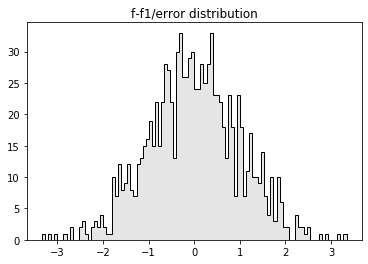

In [24]:
plt.figure()
plt.title("f-f1/error distribution")
# plot the data
plt.hist(res, color=color, bins=100, histtype="stepfilled", alpha=0.1)
plt.hist(res, color=color, bins=100, histtype="step")

In [25]:
import numpy as np
print("Стандартное отклонение:", np.var(res))
print("Среднее значение:", np.mean(res))

Стандартное отклонение: 0.985750171360494
Среднее значение: -0.010407406969940497


In [6]:
class HistPDF(zfit.pdf.BasePDF):

    def __init__(self, hist_args, hist_bins, obs, name='HistPDF'):
        self.rv_hist = scipy.stats.rv_histogram([hist_args, hist_bins])  # or something, unsure
        super().__init__(obs=obs, name=name)

    def _unnormalized_pdf(self, x):
        x = z.unstack_x(x)
        probs =  z.py_function(func=self.rv_hist.pdf, inp=[x], Tout=tf.float64)
        probs.set_shape(x.shape)
        return probs

In [8]:
import scipy.stats
import numpy as np
hist = np.histogram(data_np, bins=100)
hist_dist = scipy.stats.rv_histogram(hist)
hist_pdf = HistPDF(hist_dist, obs=obs1)

TypeError: __init__() missing 1 required positional argument: 'hist_bins'

In [ ]:
import matplotlib.pyplot as plt
X = np.linspace(0, 10.0, 100)
plt.title("PDF from Template")
plt.hist(data_np, density=True, bins=100)
plt.plot(X, hist_dist.pdf(X), label='PDF')
plt.show()

In [ ]:
import tensorflow as tf
probs =  tf.py_function(func=rv_hist.pdf, inp=hist_dist)

In [ ]:
print(hist_dist)

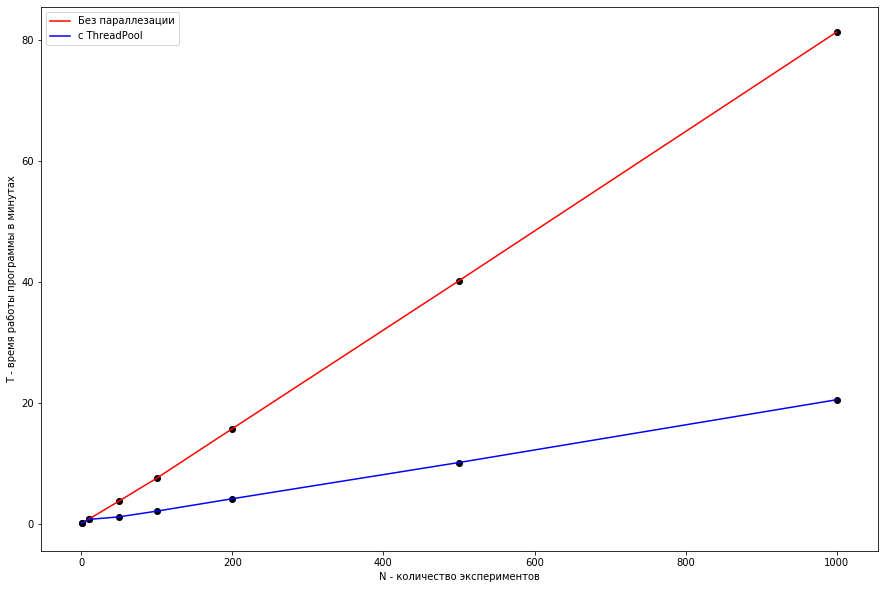

In [35]:
T_arr = [0.061, 0.71, 3.7, 7.5, 15.7, 40.2, 81.4]
N_arr = [1, 10, 50, 100, 200, 500 ,1000]
T_arr2 = [0.068, 0.68, 1.1, 2.05, 4.1, 10.1, 20.5]
N_arr2 = [1, 10, 50, 100, 200, 500 ,1000]
plt.figure(figsize=(15, 10))
plt.xlabel('N - количество экспериментов')
plt.ylabel('T - время работы программы в минутах')
plt.scatter(N_arr, T_arr, c='black')
plt.scatter(N_arr2, T_arr2, c='black')
plt.plot(N_arr, T_arr, 'r', label="Без параллезации",)
plt.plot(N_arr2, T_arr2, 'b', label="c ThreadPool",)
plt.legend()
plt.show()
